<a href="https://colab.research.google.com/github/MadalinaStefan/OCR_comparison/blob/main/tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STANDARD**

In [23]:
!pip install keras_ocr
!pip install pybind11
!pip3 install fastwer

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/rich/console.py", line 47, in <module>
    from . import errors, themes
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/rich/themes.py", line 2, in <module>
    from .theme import Theme
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/rich/theme.py", line 1, in <module>
    import configparser
  File "/usr/lib/python3.10/configparser.py", line 523, in <module>
    class LegacyInterpolation(Interpolation):
  File "/usr/lib/python3.10/configparser.py", line 527, in LegacyInterpolation
    _KEYCRE = re.compile(r

In [24]:
from google.colab import drive
import os
import keras_ocr
import matplotlib.pyplot as plt
import pandas as pd
import fastwer
import numpy as np



drive.mount('/content/drive')
pipeline = keras_ocr.pipeline.Pipeline()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [25]:
images_folder = '/content/drive/MyDrive/dataset_immagini'
csv_folder = '/content/drive/MyDrive/golden_text'

images = []
labels = []
true_texts = []

for folder_class in os.listdir(images_folder):
  path = csv_folder + '/' + folder_class + '.csv'
  texts = pd.read_csv(path).values

  #for value in df.values:
   #true_text.append(value[0])

  for file in os.listdir(images_folder + '/' + folder_class):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
      images.append(images_folder + '/' + folder_class + '/' + file)
      labels.append(folder_class)
      index = int(file.split('.')[0])
      true_texts.append(texts[index][0])


In [26]:
images_path = images
images = [keras_ocr.tools.read(img) for img in images]
images = np.array(images)
true_texts = np.array(true_texts)

<ipython-input-26-15ab73f2a8d5>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [27]:
def visualize_images(images, grey=False):
  f, grid_plot = plt.subplots(4, 5, figsize=(20,40))

  if grey:
    grid_plot[0,0].imshow(images[0], cmap='Greys')
    grid_plot[0,1].imshow(images[1], cmap='Greys')
    grid_plot[0,2].imshow(images[2], cmap='Greys')
    grid_plot[0,3].imshow(images[3], cmap='Greys')
    grid_plot[0,4].imshow(images[4], cmap='Greys')
    grid_plot[1,0].imshow(images[5], cmap='Greys')
    grid_plot[1,1].imshow(images[6], cmap='Greys')
    grid_plot[1,2].imshow(images[7], cmap='Greys')
    grid_plot[1,3].imshow(images[8], cmap='Greys')
    grid_plot[1,4].imshow(images[9], cmap='Greys')
    grid_plot[2,0].imshow(images[10], cmap='Greys')
    grid_plot[2,1].imshow(images[11], cmap='Greys')
    grid_plot[2,2].imshow(images[12], cmap='Greys')
    grid_plot[2,3].imshow(images[13], cmap='Greys')
    grid_plot[2,4].imshow(images[14], cmap='Greys')
    grid_plot[3,0].imshow(images[15], cmap='Greys')
    grid_plot[3,1].imshow(images[16], cmap='Greys')
    grid_plot[3,2].imshow(images[17], cmap='Greys')
    grid_plot[3,3].imshow(images[18], cmap='Greys')
    grid_plot[3,4].imshow(images[19], cmap='Greys')
  else:
    grid_plot[0,0].imshow(images[0])
    grid_plot[0,1].imshow(images[1])
    grid_plot[0,2].imshow(images[2])
    grid_plot[0,3].imshow(images[3])
    grid_plot[0,4].imshow(images[4])
    grid_plot[1,0].imshow(images[5])
    grid_plot[1,1].imshow(images[6])
    grid_plot[1,2].imshow(images[7])
    grid_plot[1,3].imshow(images[8])
    grid_plot[1,4].imshow(images[9])
    grid_plot[2,0].imshow(images[10])
    grid_plot[2,1].imshow(images[11])
    grid_plot[2,2].imshow(images[12])
    grid_plot[2,3].imshow(images[13])
    grid_plot[2,4].imshow(images[14])
    grid_plot[3,0].imshow(images[15])
    grid_plot[3,1].imshow(images[16])
    grid_plot[3,2].imshow(images[17])
    grid_plot[3,3].imshow(images[18])
    grid_plot[3,4].imshow(images[19])


In [28]:
def resize_image(img, scale_percent=25):
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)

  return cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)

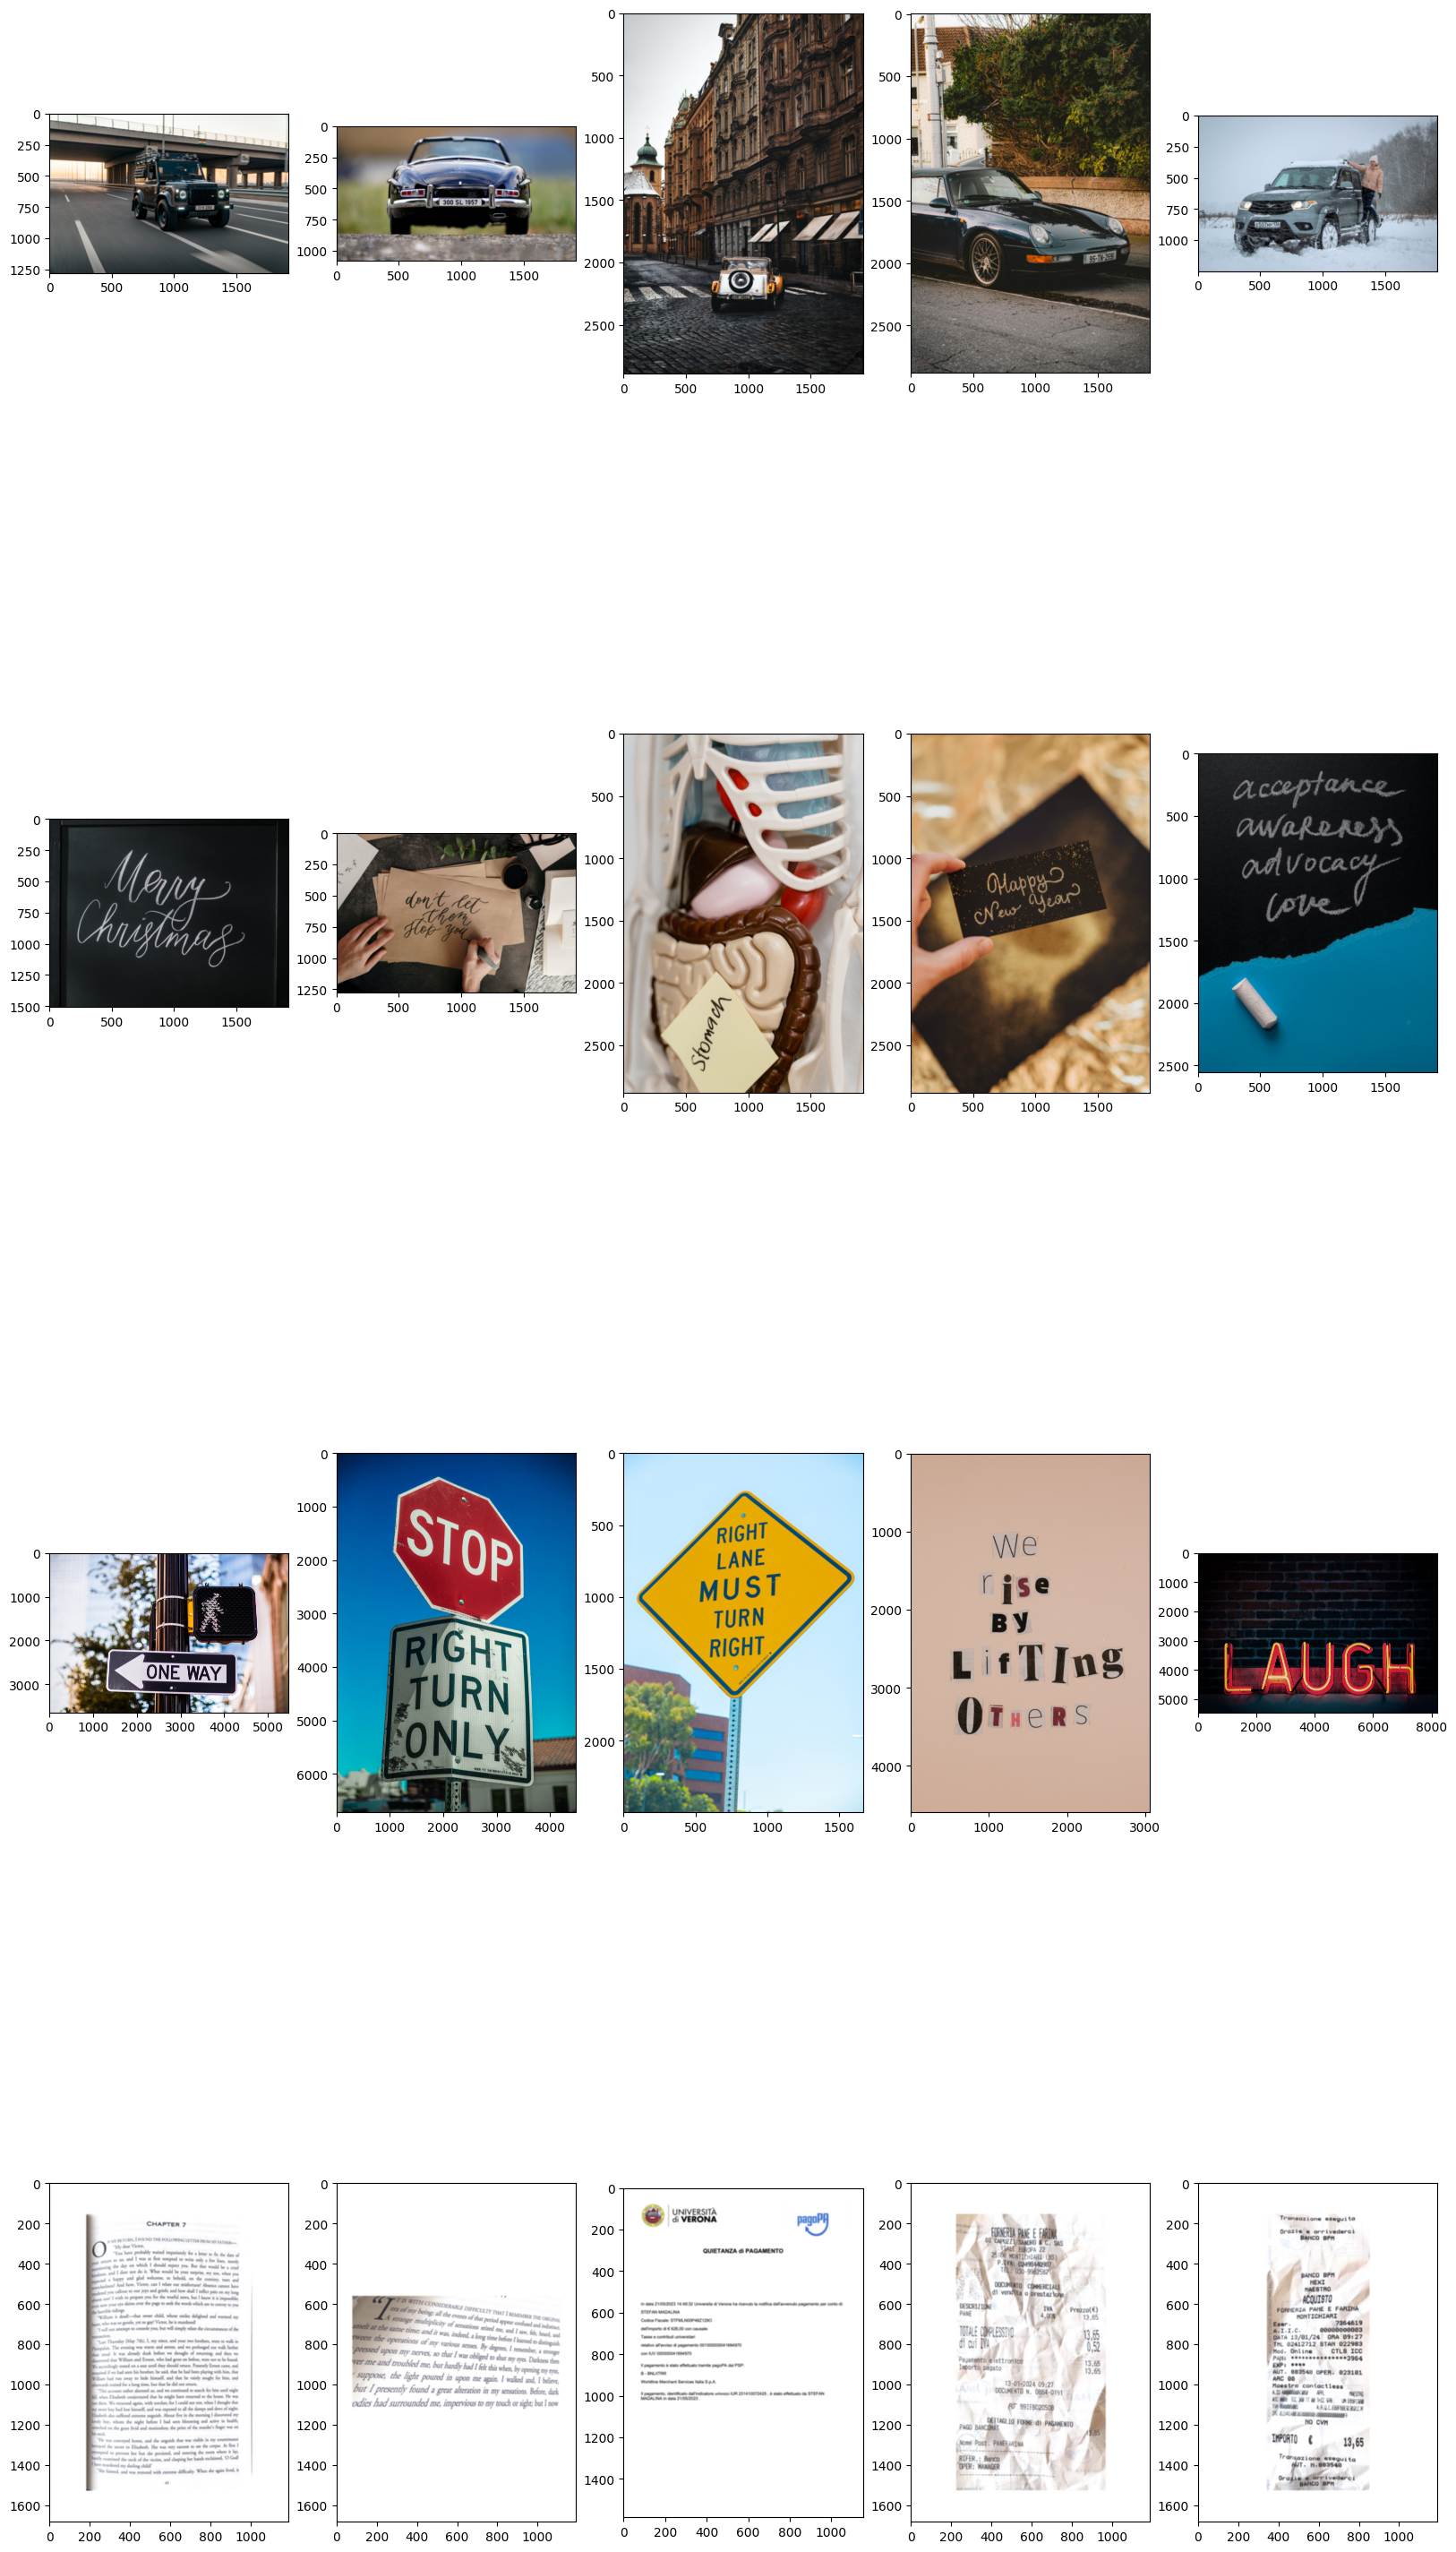

In [29]:
import cv2
import numpy as np

def image_transform(images, t_type, scale = False):
  transform_images = []
  images_scaled = []

  if scale:
    for img in images:
      images_scaled.append(resize_image(img, 25))
  else:
    images_scaled = images

  for img in images:
    if t_type == 'blur':
      #image = cv2.GaussianBlur(img, (7, 7), 0)
      image = cv2.blur(img, (7, 7))
    elif t_type == 'rotation':
      image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    else:
      #weights = [0.2989, 0.5870, 0.1140]
      #image = np.dot(img[..., :3], weights)
      image =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    transform_images.append(image)

  return transform_images

t_images = image_transform(images, 'blur') #rotation, blur o gray

#visualize_images(images, False) #gray
visualize_images(t_images, True) #blur, rotation

# **Tesseract**


In [30]:
! sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [31]:
!pip install pytesseract

In [32]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)



In [33]:
import pytesseract
from PIL import Image
from matplotlib import cm

custom_config = r'--oem 3 --psm 6'


In [34]:
from re import L

def ocr_on_tesseract(images, lang='eng'):
  texts_pred = []

  for image in images:
    testo_estratto = pytesseract.image_to_string(Image.fromarray(image), lang='eng')
    texts_pred.append(testo_estratto)

  return texts_pred


In [35]:
ocr_on_tesseract(images[0:3])

[' \n\x0c',
 '  \n\x0c',
 ' \n\n      \n\nhie — ta =\nSS — |\n\n%\n\n \n\n \n\n \n\n \n\n \n\n= y a <\nSSE\n\n \n\n \n\n \n\n \n\x0c']

In [36]:
#immagine

# **METRICHE**


In [37]:
def calculate_scores(pred_texts, true_texts):
  scores_cer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower(), char_level=True) for i in range(len(pred_texts)) ]

  scores_wer = [ fastwer.score_sent(pred_texts[i].lower(), true_texts[i].lower()) for i in range(len(pred_texts)) ]

  return scores_cer, scores_wer

In [38]:
def generate_csv(data_class, trans, cer, wer):
  d = {'augmentation': trans, 'cer': cer, 'wer': wer}
  df = pd.DataFrame(data=d)

  csv_name = data_class + '.csv'
  df.to_csv(csv_name, sep=',', index=False)
  df

In [39]:
labels = np.array(labels)
quality = ['high', 'low']
augmentation = ['natural', 'blur', 'rotation', 'grey']

for label in set(labels):
  print(label)
  class_index = np.where(labels==label)[0]
  test_images = []

  column_cer = []
  column_wer = []
  column_trans = []

  for q in quality:
    for a in augmentation:
      print(q+'-'+a)
      if a == 'natural' and q == 'low':
        test_images = [resize_image(x) for x in images[class_index]]
      elif a == 'natural' and q == 'high':
        test_images = images[class_index]

      if a != 'natural':
        if q == 'high':
          test_images = image_transform(images[class_index], a)
        else:
          test_images = image_transform(images[class_index], a, scale=True)

      pred_texts = ocr_on_tesseract(test_images)

      cer, wer = calculate_scores(pred_texts, true_texts[class_index])

      column_cer.append(round(np.mean(cer), 2))
      column_wer.append(round(np.mean(wer), 2))
      column_trans.append(str(q)+'-'+str(a))

  generate_csv(label, column_trans, column_cer, column_wer)

car_plates
high-natural
high-blur
high-rotation
high-grey
low-natural
low-blur
low-rotation
low-grey
handwritten_texts
high-natural
high-blur
high-rotation
high-grey
low-natural
low-blur
low-rotation
low-grey
structured_text
high-natural
high-blur
high-rotation
high-grey
low-natural
low-blur
low-rotation
low-grey
unstructured_text
high-natural
high-blur
high-rotation
high-grey
low-natural
low-blur
low-rotation
low-grey
